In [1]:
#Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats as st

In [39]:
pd.set_option('display.max_columns',85) ## to change setting so that we can see all the col.
pd.set_option('display.max_colwidth', 2000)
df = pd.read_csv('MetadataCleanedFinal.csv')
df


,transaction_type,actual_shipping_days,scheduled_shipping_days,earnings_per_order,sales_per_customer,delivery_status,late_delivery,category_id,category_name,purchase_city,purchase_country,customer_first_name,customer_last_name,customer_segment,purchase_state,purchase_street,purchase_zipcode,department_category,latitude,longitude,market_region,order_city,order_country,order_date,order_item_discount,order_item_discount_rate,order_item_rate,order_item_profit_ratio,order_item_quantity,gross_sales_per_customer,net_sales_per_customer,net_profit_per_order,order_region,order_state,order_status,product_name,product_availability,shipping_date,shipping_mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Cally,Holloway,Consumer,PR,5365 Noble Nectar Island,725,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,2018-01-31 22:56:00,13.110000,0.04,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,Smart watch,0,2018-02-03 22:56:00,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,Irene,Luna,Consumer,PR,2679 Rustic Loop,725,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,2018-01-13 12:27:00,16.389999,0.05,327.750000,-0.80,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,PENDING,Smart watch,0,2018-01-18 12:27:00,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,United States,Gillian,Maldonado,Consumer,CA,8510 Round Bear Gate,95125,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,2018-01-13 12:06:00,18.030001,0.06,327.750000,-0.80,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,CLOSED,Smart watch,0,2018-01-17 12:06:00,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,United States,Tana,Tate,Home Office,CA,3200 Amber Bend,90027,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,2018-01-13 11:45:00,22.940001,0.07,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,Smart watch,0,2018-01-16 11:45:00,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Orli,Hendricks,Corporate,PR,8671 Iron Anchor Corners,725,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,2018-01-13 11:24:00,29.500000,0.09,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,Smart watch,0,2018-01-15 11:24:00,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,United States,Maria,Peterson,Home Office,NY,1322 Broad Glade,11207,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,2016-01-16 03:40:00,0.000000,0.00,399.980011,0.10,1,399.980011,399.980011,40.000000,Eastern Asia,Shanghái,CLOSED,Field & Stream Sportsman 16 Gun Fire Safe,0,2016-01-20 03:40:00,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,United States,Ronald,Clark,Corporate,CA,7330 Broad Apple Moor,93304,Fan Shop,35.362545,-119.018700,Pacific Asia,Hirakata,Japan,2016-01-16 01:34:00,4.000000,0.01,399.980011,-1.55,1,399.980011,395.980011,-613.770019,Eastern Asia,Osaka,COMPLETE,Field & Stream Sportsman 16 Gun Fire Safe,0,2016-01-19 01:34:00,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,United States,John,Smith,Corporate,CT,97 Burning Landing,6010,Fan Shop,41.629959,-72.967155,Pacific Asia,Adelaide,Australia,2016-01-15 21:00:00,8.000000,0.02,399.980011,0.36,1,399.980011,391.980011,141.110001,Oceania,Australia del Sur,PENDING,Field & Stream Sportsman 16 Gun Fire Safe,0,2016-01-20 21:00:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,Puerto Rico,Mary,Smith,Consumer,PR,2585 Silent Autumn Landin

In [3]:
schema = pd.read_csv('SchemaNewFinal.csv',index_col="UpdatedColName")
schema

,FIELDS,DESCRIPTION
UpdatedColName,,
transaction_type,Type,: Type of transaction made
actual_shipping_days,Days for shipping (real),: Actual shipping days of the purchased product
scheduled_shipping_days,Days for shipment (scheduled),: Days of scheduled delivery of the purchased product
earnings_per_order,Benefit per order,: Earnings per order placed
sales_per_customer,Sales per customer,: Total sales per customer made per customer
delivery_status,Delivery Status,": Delivery status of orders: Advance shipping , Late delivery , Shipping canceled , Shipping on time"
late_delivery,Late_delivery_risk,": Categorical variable that indicates if sending is late (1), it is not late (0)."
category_id,Category Id,: Product category code
category_name,Category Name,: Description of the product category


In [4]:
df['order_date'] = pd.to_datetime(df['order_date']).dt.strftime('%Y/%m/%d %H:%M')
df['order_date'] = pd.to_datetime(df['order_date'], format='%Y/%m/%d %H:%M')
df['order_date']

0        2018-01-31 22:56:00
1        2018-01-13 12:27:00
2        2018-01-13 12:06:00
3        2018-01-13 11:45:00
4        2018-01-13 11:24:00
                 ...        
180514   2016-01-16 03:40:00
180515   2016-01-16 01:34:00
180516   2016-01-15 21:00:00
180517   2016-01-15 20:18:00
180518   2016-01-15 18:54:00
Name: order_date, Length: 180519, dtype: datetime64[ns]

In [5]:
df['shipping_date'] = pd.to_datetime(df['shipping_date']).dt.strftime('%Y/%m/%d %H:%M')
df['shipping_date'] = pd.to_datetime(df['shipping_date'], format='%Y/%m/%d %H:%M')
df['shipping_date']

0        2018-02-03 22:56:00
1        2018-01-18 12:27:00
2        2018-01-17 12:06:00
3        2018-01-16 11:45:00
4        2018-01-15 11:24:00
                 ...        
180514   2016-01-20 03:40:00
180515   2016-01-19 01:34:00
180516   2016-01-20 21:00:00
180517   2016-01-18 20:18:00
180518   2016-01-19 18:54:00
Name: shipping_date, Length: 180519, dtype: datetime64[ns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 39 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   transaction_type          180519 non-null  object        
 1   actual_shipping_days      180519 non-null  int64         
 2   scheduled_shipping_days   180519 non-null  int64         
 3   earnings_per_order        180519 non-null  float64       
 4   sales_per_customer        180519 non-null  float64       
 5   delivery_status           180519 non-null  object        
 6   late_delivery             180519 non-null  int64         
 7   category_id               180519 non-null  int64         
 8   category_name             180519 non-null  object        
 9   purchase_city             180519 non-null  object        
 10  purchase_country          180519 non-null  object        
 11  customer_first_name       180519 non-null  object        
 12  cu

In [7]:
corr = df[[ 'actual_shipping_days', 'scheduled_shipping_days'
                                        ]]
shipping_corr = corr.corr()
shipping_corr

,actual_shipping_days,scheduled_shipping_days
actual_shipping_days,1.00000,0.51588
scheduled_shipping_days,0.51588,1.00000


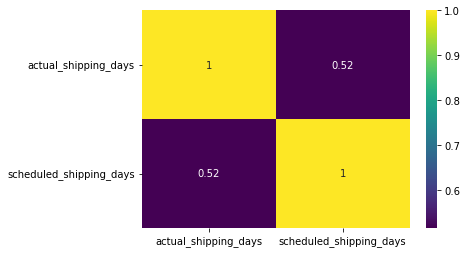

In [8]:
corr_plot_2 = sns.heatmap(shipping_corr, annot = True,cmap='viridis')
corr_plot_2.figure.savefig('corr22.png', dpi=500,bbox_inches='tight')

In [9]:
corr1 = df[[ 'net_profit_per_order', 'late_delivery' ]]
profit_corr = corr1.corr()
profit_corr

,net_profit_per_order,late_delivery
net_profit_per_order,1.000000,-0.003727
late_delivery,-0.003727,1.000000


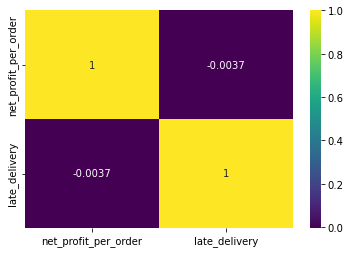

In [10]:
corr_plot_3 = sns.heatmap(profit_corr, annot = True,cmap='viridis')
corr_plot_3.figure.savefig('corr33.png', dpi=500,bbox_inches='tight')

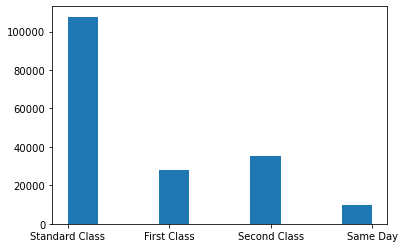

In [11]:
bar_plot = plt.hist(df.shipping_mode)

<AxesSubplot:xlabel='net_profit_per_order', ylabel='department_category'>

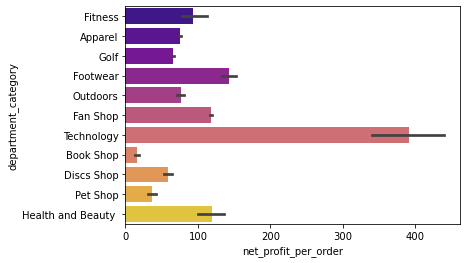

In [12]:
sns.barplot(x ='net_profit_per_order', y ='department_category', data = df,
            palette ='plasma', estimator = np.std)

<AxesSubplot:xlabel='late_delivery', ylabel='department_category'>

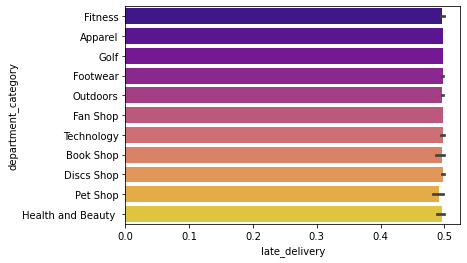

In [13]:
sns.barplot(x ='late_delivery', y ='department_category', data = df,
            palette ='plasma', estimator = np.std)

<AxesSubplot:xlabel='shipping_mode', ylabel='late_delivery'>

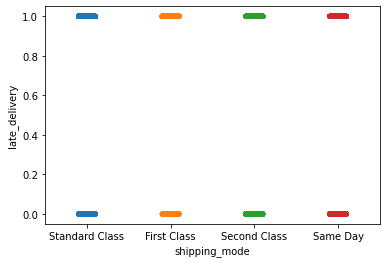

In [14]:
sns.stripplot(x = 'shipping_mode', y = 'late_delivery', data = df, jitter = True)

<AxesSubplot:xlabel='shipping_mode', ylabel='late_delivery'>

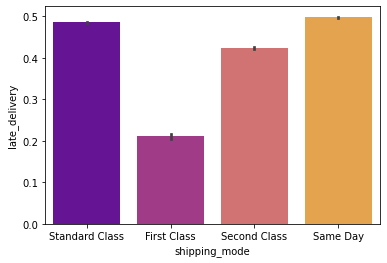

In [15]:
sns.barplot(x ='shipping_mode', y ='late_delivery', data = df,
            palette ='plasma', estimator = np.std)

<AxesSubplot:xlabel='actual_shipping_days', ylabel='shipping_mode'>

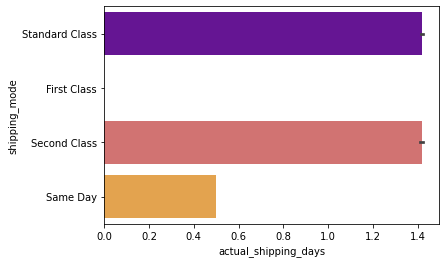

In [16]:
sns.barplot(x ='actual_shipping_days', y ='shipping_mode', data = df,
            palette ='plasma', estimator = np.std)

<AxesSubplot:xlabel='actual_shipping_days', ylabel='department_category'>

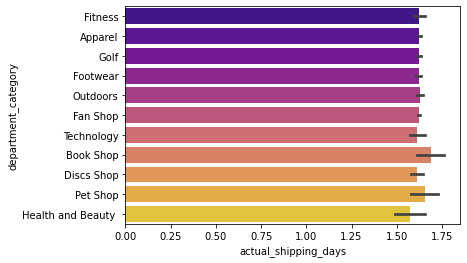

In [17]:
sns.barplot(x ='actual_shipping_days', y ='department_category', data = df,
            palette ='plasma', estimator = np.std)

<AxesSubplot:xlabel='order_item_discount', ylabel='department_category'>

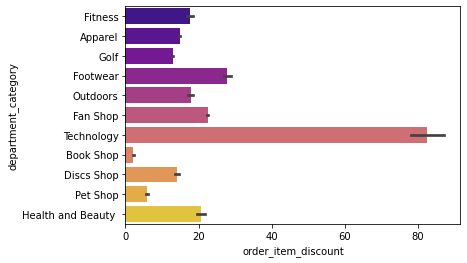

In [18]:
 sns.barplot(x ='order_item_discount', y ='department_category', data = df,
            palette ='plasma', estimator = np.std)

<AxesSubplot:xlabel='net_profit_per_order', ylabel='department_category'>

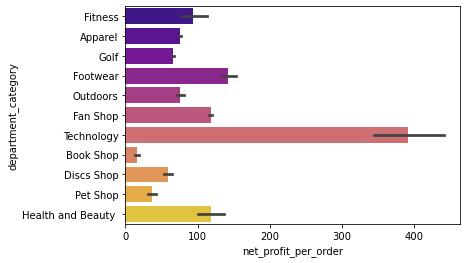

In [19]:
  sns.barplot(x ='net_profit_per_order', y ='department_category', data = df,
            palette ='plasma', estimator = np.std)

C:\Users\prite_ef\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prite_ef\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prite_ef\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='purchase_country', ylabel='count'>

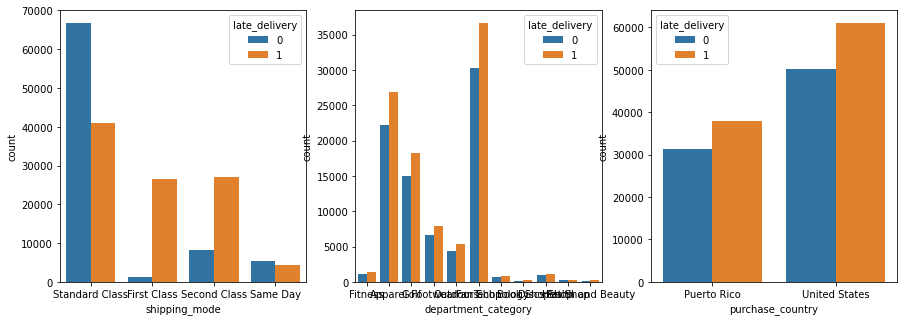

In [20]:
fig, ax = plt.subplots(ncols = 3, figsize=(15, 5))
sns.countplot('shipping_mode', hue = 'late_delivery', data = df, ax = ax[0])
sns.countplot('department_category', hue = 'late_delivery', data = df, ax = ax[1])
sns.countplot('purchase_country', hue = 'late_delivery', data = df, ax = ax[2])

C:\Users\prite_ef\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='late_delivery', ylabel='count'>

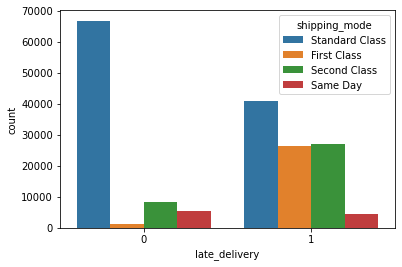

In [21]:
sns.countplot('late_delivery', hue = 'shipping_mode', data = df)

In [40]:
df


,transaction_type,actual_shipping_days,scheduled_shipping_days,earnings_per_order,sales_per_customer,delivery_status,late_delivery,category_id,category_name,purchase_city,purchase_country,customer_first_name,customer_last_name,customer_segment,purchase_state,purchase_street,purchase_zipcode,department_category,latitude,longitude,market_region,order_city,order_country,order_date,order_item_discount,order_item_discount_rate,order_item_rate,order_item_profit_ratio,order_item_quantity,gross_sales_per_customer,net_sales_per_customer,net_profit_per_order,order_region,order_state,order_status,product_name,product_availability,shipping_date,shipping_mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Cally,Holloway,Consumer,PR,5365 Noble Nectar Island,725,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,2018-01-31 22:56:00,13.110000,0.04,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,Smart watch,0,2018-02-03 22:56:00,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,Irene,Luna,Consumer,PR,2679 Rustic Loop,725,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,2018-01-13 12:27:00,16.389999,0.05,327.750000,-0.80,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,PENDING,Smart watch,0,2018-01-18 12:27:00,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,United States,Gillian,Maldonado,Consumer,CA,8510 Round Bear Gate,95125,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,2018-01-13 12:06:00,18.030001,0.06,327.750000,-0.80,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,CLOSED,Smart watch,0,2018-01-17 12:06:00,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,United States,Tana,Tate,Home Office,CA,3200 Amber Bend,90027,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,2018-01-13 11:45:00,22.940001,0.07,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,Smart watch,0,2018-01-16 11:45:00,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Orli,Hendricks,Corporate,PR,8671 Iron Anchor Corners,725,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,2018-01-13 11:24:00,29.500000,0.09,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,Smart watch,0,2018-01-15 11:24:00,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,United States,Maria,Peterson,Home Office,NY,1322 Broad Glade,11207,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,2016-01-16 03:40:00,0.000000,0.00,399.980011,0.10,1,399.980011,399.980011,40.000000,Eastern Asia,Shanghái,CLOSED,Field & Stream Sportsman 16 Gun Fire Safe,0,2016-01-20 03:40:00,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,United States,Ronald,Clark,Corporate,CA,7330 Broad Apple Moor,93304,Fan Shop,35.362545,-119.018700,Pacific Asia,Hirakata,Japan,2016-01-16 01:34:00,4.000000,0.01,399.980011,-1.55,1,399.980011,395.980011,-613.770019,Eastern Asia,Osaka,COMPLETE,Field & Stream Sportsman 16 Gun Fire Safe,0,2016-01-19 01:34:00,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,United States,John,Smith,Corporate,CT,97 Burning Landing,6010,Fan Shop,41.629959,-72.967155,Pacific Asia,Adelaide,Australia,2016-01-15 21:00:00,8.000000,0.02,399.980011,0.36,1,399.980011,391.980011,141.110001,Oceania,Australia del Sur,PENDING,Field & Stream Sportsman 16 Gun Fire Safe,0,2016-01-20 21:00:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,Puerto Rico,Mary,Smith,Consumer,PR,2585 Silent Autumn Landin

In [24]:
schema.loc['late_delivery']

FIELDS                                                              Late_delivery_risk           
DESCRIPTION    :  Categorical variable that indicates if sending is late (1), it is not late (0).
Name: late_delivery, dtype: object

In [41]:
df['late_delivery']=df['late_delivery'].replace({1: "Yes", 0: "No"})
df

,transaction_type,actual_shipping_days,scheduled_shipping_days,earnings_per_order,sales_per_customer,delivery_status,late_delivery,category_id,category_name,purchase_city,purchase_country,customer_first_name,customer_last_name,customer_segment,purchase_state,purchase_street,purchase_zipcode,department_category,latitude,longitude,market_region,order_city,order_country,order_date,order_item_discount,order_item_discount_rate,order_item_rate,order_item_profit_ratio,order_item_quantity,gross_sales_per_customer,net_sales_per_customer,net_profit_per_order,order_region,order_state,order_status,product_name,product_availability,shipping_date,shipping_mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,No,73,Sporting Goods,Caguas,Puerto Rico,Cally,Holloway,Consumer,PR,5365 Noble Nectar Island,725,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,2018-01-31 22:56:00,13.110000,0.04,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,Smart watch,0,2018-02-03 22:56:00,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,Yes,73,Sporting Goods,Caguas,Puerto Rico,Irene,Luna,Consumer,PR,2679 Rustic Loop,725,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,2018-01-13 12:27:00,16.389999,0.05,327.750000,-0.80,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,PENDING,Smart watch,0,2018-01-18 12:27:00,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,No,73,Sporting Goods,San Jose,United States,Gillian,Maldonado,Consumer,CA,8510 Round Bear Gate,95125,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,2018-01-13 12:06:00,18.030001,0.06,327.750000,-0.80,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,CLOSED,Smart watch,0,2018-01-17 12:06:00,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,No,73,Sporting Goods,Los Angeles,United States,Tana,Tate,Home Office,CA,3200 Amber Bend,90027,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,2018-01-13 11:45:00,22.940001,0.07,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,Smart watch,0,2018-01-16 11:45:00,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,No,73,Sporting Goods,Caguas,Puerto Rico,Orli,Hendricks,Corporate,PR,8671 Iron Anchor Corners,725,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,2018-01-13 11:24:00,29.500000,0.09,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,Smart watch,0,2018-01-15 11:24:00,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,No,45,Fishing,Brooklyn,United States,Maria,Peterson,Home Office,NY,1322 Broad Glade,11207,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,2016-01-16 03:40:00,0.000000,0.00,399.980011,0.10,1,399.980011,399.980011,40.000000,Eastern Asia,Shanghái,CLOSED,Field & Stream Sportsman 16 Gun Fire Safe,0,2016-01-20 03:40:00,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,Yes,45,Fishing,Bakersfield,United States,Ronald,Clark,Corporate,CA,7330 Broad Apple Moor,93304,Fan Shop,35.362545,-119.018700,Pacific Asia,Hirakata,Japan,2016-01-16 01:34:00,4.000000,0.01,399.980011,-1.55,1,399.980011,395.980011,-613.770019,Eastern Asia,Osaka,COMPLETE,Field & Stream Sportsman 16 Gun Fire Safe,0,2016-01-19 01:34:00,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,Yes,45,Fishing,Bristol,United States,John,Smith,Corporate,CT,97 Burning Landing,6010,Fan Shop,41.629959,-72.967155,Pacific Asia,Adelaide,Australia,2016-01-15 21:00:00,8.000000,0.02,399.980011,0.36,1,399.980011,391.980011,141.110001,Oceania,Australia del Sur,PENDING,Field & Stream Sportsman 16 Gun Fire Safe,0,2016-01-20 21:00:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,No,45,Fishing,Caguas,Puerto Rico,Mary,Smith,Consumer,PR,2585 Silent A

In [44]:
df=df.rename(columns={'late_delivery':'late_delivery_risk'})

In [45]:
df

,transaction_type,actual_shipping_days,scheduled_shipping_days,earnings_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name,purchase_city,purchase_country,customer_first_name,customer_last_name,customer_segment,purchase_state,purchase_street,purchase_zipcode,department_category,latitude,longitude,market_region,order_city,order_country,order_date,order_item_discount,order_item_discount_rate,order_item_rate,order_item_profit_ratio,order_item_quantity,gross_sales_per_customer,net_sales_per_customer,net_profit_per_order,order_region,order_state,order_status,product_name,product_availability,shipping_date,shipping_mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,No,73,Sporting Goods,Caguas,Puerto Rico,Cally,Holloway,Consumer,PR,5365 Noble Nectar Island,725,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,2018-01-31 22:56:00,13.110000,0.04,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,Smart watch,0,2018-02-03 22:56:00,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,Yes,73,Sporting Goods,Caguas,Puerto Rico,Irene,Luna,Consumer,PR,2679 Rustic Loop,725,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,2018-01-13 12:27:00,16.389999,0.05,327.750000,-0.80,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,PENDING,Smart watch,0,2018-01-18 12:27:00,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,No,73,Sporting Goods,San Jose,United States,Gillian,Maldonado,Consumer,CA,8510 Round Bear Gate,95125,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,2018-01-13 12:06:00,18.030001,0.06,327.750000,-0.80,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,CLOSED,Smart watch,0,2018-01-17 12:06:00,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,No,73,Sporting Goods,Los Angeles,United States,Tana,Tate,Home Office,CA,3200 Amber Bend,90027,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,2018-01-13 11:45:00,22.940001,0.07,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,Smart watch,0,2018-01-16 11:45:00,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,No,73,Sporting Goods,Caguas,Puerto Rico,Orli,Hendricks,Corporate,PR,8671 Iron Anchor Corners,725,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,2018-01-13 11:24:00,29.500000,0.09,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,Smart watch,0,2018-01-15 11:24:00,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,No,45,Fishing,Brooklyn,United States,Maria,Peterson,Home Office,NY,1322 Broad Glade,11207,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,2016-01-16 03:40:00,0.000000,0.00,399.980011,0.10,1,399.980011,399.980011,40.000000,Eastern Asia,Shanghái,CLOSED,Field & Stream Sportsman 16 Gun Fire Safe,0,2016-01-20 03:40:00,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,Yes,45,Fishing,Bakersfield,United States,Ronald,Clark,Corporate,CA,7330 Broad Apple Moor,93304,Fan Shop,35.362545,-119.018700,Pacific Asia,Hirakata,Japan,2016-01-16 01:34:00,4.000000,0.01,399.980011,-1.55,1,399.980011,395.980011,-613.770019,Eastern Asia,Osaka,COMPLETE,Field & Stream Sportsman 16 Gun Fire Safe,0,2016-01-19 01:34:00,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,Yes,45,Fishing,Bristol,United States,John,Smith,Corporate,CT,97 Burning Landing,6010,Fan Shop,41.629959,-72.967155,Pacific Asia,Adelaide,Australia,2016-01-15 21:00:00,8.000000,0.02,399.980011,0.36,1,399.980011,391.980011,141.110001,Oceania,Australia del Sur,PENDING,Field & Stream Sportsman 16 Gun Fire Safe,0,2016-01-20 21:00:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,No,45,Fishing,Caguas,Puerto Rico,Mary,Smith,Consumer,PR,2585 Sil

In [46]:
df.head(2)

,transaction_type,actual_shipping_days,scheduled_shipping_days,earnings_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name,purchase_city,purchase_country,customer_first_name,customer_last_name,customer_segment,purchase_state,purchase_street,purchase_zipcode,department_category,latitude,longitude,market_region,order_city,order_country,order_date,order_item_discount,order_item_discount_rate,order_item_rate,order_item_profit_ratio,order_item_quantity,gross_sales_per_customer,net_sales_per_customer,net_profit_per_order,order_region,order_state,order_status,product_name,product_availability,shipping_date,shipping_mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,No,73,Sporting Goods,Caguas,Puerto Rico,Cally,Holloway,Consumer,PR,5365 Noble Nectar Island,725,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,2018-01-31 22:56:00,13.110000,0.04,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,Smart watch,0,2018-02-03 22:56:00,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,Yes,73,Sporting Goods,Caguas,Puerto Rico,Irene,Luna,Consumer,PR,2679 Rustic Loop,725,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,2018-01-13 12:27:00,16.389999,0.05,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,Smart watch,0,2018-01-18 12:27:00,Standard Class


In [47]:
df.to_csv('FinalMetaData_SCM.csv', index = False)

In [49]:
corr2 = df[[ 'order_item_quantity', 'order_item_discount_rate' ]]
profit_corr2 = corr2.corr()
profit_corr2

,order_item_quantity,order_item_discount_rate
order_item_quantity,1.000000,-0.000028
order_item_discount_rate,-0.000028,1.000000


In [3]:
import pandas as pd
import numpy as np
df=pd.read_csv('FinalMetaData_SCM.csv')

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 39 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   transaction_type          180519 non-null  object 
 1   actual_shipping_days      180519 non-null  int64  
 2   scheduled_shipping_days   180519 non-null  int64  
 3   earnings_per_order        180519 non-null  float64
 4   sales_per_customer        180519 non-null  float64
 5   delivery_status           180519 non-null  object 
 6   late_delivery_risk        180519 non-null  object 
 7   category_id               180519 non-null  int64  
 8   category_name             180519 non-null  object 
 9   purchase_city             180519 non-null  object 
 10  purchase_country          180519 non-null  object 
 11  customer_first_name       180519 non-null  object 
 12  customer_last_name        180519 non-null  object 
 13  customer_segment          180519 non-null  o

In [6]:
df.columns

Index(['transaction_type', 'actual_shipping_days', 'scheduled_shipping_days',
       'earnings_per_order', 'sales_per_customer', 'delivery_status',
       'late_delivery_risk', 'category_id', 'category_name', 'purchase_city',
       'purchase_country', 'customer_first_name', 'customer_last_name',
       'customer_segment', 'purchase_state', 'purchase_street',
       'purchase_zipcode', 'department_category', 'latitude', 'longitude',
       'market_region', 'order_city', 'order_country', 'order_date',
       'order_item_discount', 'order_item_discount_rate', 'order_item_rate',
       'order_item_profit_ratio', 'order_item_quantity',
       'gross_sales_per_customer', 'net_sales_per_customer',
       'net_profit_per_order', 'order_region', 'order_state', 'order_status',
       'product_name', 'product_availability', 'shipping_date',
       'shipping_mode'],
      dtype='object')

In [14]:
ff=df.drop(columns=['transaction_type', 'category_id',
       'earnings_per_order', 'sales_per_customer', 
       'purchase_city',
       'purchase_country', 'customer_first_name', 'customer_last_name',
       'purchase_state', 'purchase_street',
       'purchase_zipcode', 'latitude', 'longitude',
       'market_region', 'order_city', 'order_country','order_item_discount', 'order_item_discount_rate', 'order_item_rate',
       'order_item_profit_ratio', 'order_item_quantity',
       'net_sales_per_customer',
       'net_profit_per_order', 'order_region', 'order_state', 'product_availability'])

In [15]:
ff

,actual_shipping_days,scheduled_shipping_days,delivery_status,late_delivery_risk,category_name,customer_segment,department_category,order_date,gross_sales_per_customer,order_status,product_name,shipping_date,shipping_mode
0,3,4,Advance shipping,No,Sporting Goods,Consumer,Fitness,2018-01-31 22:56:00,327.750000,COMPLETE,Smart watch,2018-02-03 22:56:00,Standard Class
1,5,4,Late delivery,Yes,Sporting Goods,Consumer,Fitness,2018-01-13 12:27:00,327.750000,PENDING,Smart watch,2018-01-18 12:27:00,Standard Class
2,4,4,Shipping on time,No,Sporting Goods,Consumer,Fitness,2018-01-13 12:06:00,327.750000,CLOSED,Smart watch,2018-01-17 12:06:00,Standard Class
3,3,4,Advance shipping,No,Sporting Goods,Home Office,Fitness,2018-01-13 11:45:00,327.750000,COMPLETE,Smart watch,2018-01-16 11:45:00,Standard Class
4,2,4,Advance shipping,No,Sporting Goods,Corporate,Fitness,2018-01-13 11:24:00,327.750000,PENDING_PAYMENT,Smart watch,2018-01-15 11:24:00,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,4,4,Shipping on time,No,Fishing,Home Office,Fan Shop,2016-01-16 03:40:00,399.980011,CLOSED,Field & Stream Sportsman 16 Gun Fire Safe,2016-01-20 03:40:00,Standard Class
180515,3,2,Late delivery,Yes,Fishing,Corporate,Fan Shop,2016-01-16 01:34:00,399.980011,COMPLETE,Field & Stream Sportsman 16 Gun Fire Safe,2016-01-19 01:34:00,Second Class
180516,5,4,Late delivery,Yes,Fishing,Corporate,Fan Shop,2016-01-15 21:00:00,399.980011,PENDING,Field & Stream Sportsman 16 Gun Fire Safe,2016-01-20 21:00:00,Standard Class
180517,3,4,Advance shipping,No,Fishing,Consumer,Fan Shop,2016-01-15 20:18:00,399.980011,PENDING_PAYMENT,Field & Stream Sportsman 16 Gun Fire Safe,2016-01-18 20:18:00,Standard Class


In [16]:
ff = ff.reindex(columns=['product_name', 'category_name', 'department_category','customer_segment','order_date','shipping_date','order_status','delivery_status','shipping_mode','gross_sales_per_customer','actual_shipping_days','scheduled_shipping_days','late_delivery_risk'])
ff

,product_name,category_name,department_category,customer_segment,order_date,shipping_date,order_status,delivery_status,shipping_mode,gross_sales_per_customer,actual_shipping_days,scheduled_shipping_days,late_delivery_risk
0,Smart watch,Sporting Goods,Fitness,Consumer,2018-01-31 22:56:00,2018-02-03 22:56:00,COMPLETE,Advance shipping,Standard Class,327.750000,3,4,No
1,Smart watch,Sporting Goods,Fitness,Consumer,2018-01-13 12:27:00,2018-01-18 12:27:00,PENDING,Late delivery,Standard Class,327.750000,5,4,Yes
2,Smart watch,Sporting Goods,Fitness,Consumer,2018-01-13 12:06:00,2018-01-17 12:06:00,CLOSED,Shipping on time,Standard Class,327.750000,4,4,No
3,Smart watch,Sporting Goods,Fitness,Home Office,2018-01-13 11:45:00,2018-01-16 11:45:00,COMPLETE,Advance shipping,Standard Class,327.750000,3,4,No
4,Smart watch,Sporting Goods,Fitness,Corporate,2018-01-13 11:24:00,2018-01-15 11:24:00,PENDING_PAYMENT,Advance shipping,Standard Class,327.750000,2,4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,Field & Stream Sportsman 16 Gun Fire Safe,Fishing,Fan Shop,Home Office,2016-01-16 03:40:00,2016-01-20 03:40:00,CLOSED,Shipping on time,Standard Class,399.980011,4,4,No
180515,Field & Stream Sportsman 16 Gun Fire Safe,Fishing,Fan Shop,Corporate,2016-01-16 01:34:00,2016-01-19 01:34:00,COMPLETE,Late delivery,Second Class,399.980011,3,2,Yes
180516,Field & Stream Sportsman 16 Gun Fire Safe,Fishing,Fan Shop,Corporate,2016-01-15 21:00:00,2016-01-20 21:00:00,PENDING,Late delivery,Standard Class,399.980011,5,4,Yes
180517,Field & Stream Sportsman 16 Gun Fire Safe,Fishing,Fan Shop,Consumer,2016-01-15 20:18:00,2016-01-18 20:18:00,PENDING_PAYMENT,Advance shipping,Standard Class,399.980011,3,4,No


In [17]:
ff['shiiping_cost']=df['gross_sales_per_customer']/100 

In [18]:
ff

,product_name,category_name,department_category,customer_segment,order_date,shipping_date,order_status,delivery_status,shipping_mode,gross_sales_per_customer,actual_shipping_days,scheduled_shipping_days,late_delivery_risk,shiiping_cost
0,Smart watch,Sporting Goods,Fitness,Consumer,2018-01-31 22:56:00,2018-02-03 22:56:00,COMPLETE,Advance shipping,Standard Class,327.750000,3,4,No,3.2775
1,Smart watch,Sporting Goods,Fitness,Consumer,2018-01-13 12:27:00,2018-01-18 12:27:00,PENDING,Late delivery,Standard Class,327.750000,5,4,Yes,3.2775
2,Smart watch,Sporting Goods,Fitness,Consumer,2018-01-13 12:06:00,2018-01-17 12:06:00,CLOSED,Shipping on time,Standard Class,327.750000,4,4,No,3.2775
3,Smart watch,Sporting Goods,Fitness,Home Office,2018-01-13 11:45:00,2018-01-16 11:45:00,COMPLETE,Advance shipping,Standard Class,327.750000,3,4,No,3.2775
4,Smart watch,Sporting Goods,Fitness,Corporate,2018-01-13 11:24:00,2018-01-15 11:24:00,PENDING_PAYMENT,Advance shipping,Standard Class,327.750000,2,4,No,3.2775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,Field & Stream Sportsman 16 Gun Fire Safe,Fishing,Fan Shop,Home Office,2016-01-16 03:40:00,2016-01-20 03:40:00,CLOSED,Shipping on time,Standard Class,399.980011,4,4,No,3.9998
180515,Field & Stream Sportsman 16 Gun Fire Safe,Fishing,Fan Shop,Corporate,2016-01-16 01:34:00,2016-01-19 01:34:00,COMPLETE,Late delivery,Second Class,399.980011,3,2,Yes,3.9998
180516,Field & Stream Sportsman 16 Gun Fire Safe,Fishing,Fan Shop,Corporate,2016-01-15 21:00:00,2016-01-20 21:00:00,PENDING,Late delivery,Standard Class,399.980011,5,4,Yes,3.9998
180517,Field & Stream Sportsman 16 Gun Fire Safe,Fishing,Fan Shop,Consumer,2016-01-15 20:18:00,2016-01-18 20:18:00,PENDING_PAYMENT,Advance shipping,Standard Class,399.980011,3,4,No,3.9998


In [19]:
ff.to_csv('ShippingManagementData.csv', index = False)

In [20]:
ff.isna().sum()

product_name                0
category_name               0
department_category         0
customer_segment            0
order_date                  0
shipping_date               0
order_status                0
delivery_status             0
shipping_mode               0
gross_sales_per_customer    0
actual_shipping_days        0
scheduled_shipping_days     0
late_delivery_risk          0
shiiping_cost               0
dtype: int64

In [84]:
ff=pd.read_csv("ShippingManagementData.csv")

In [85]:
ff

,product_name,category_name,department_category,customer_segment,shipping_date,order_status,delivery_status,shipping_mode,gross_sales_per_customer,actual_shipping_days,scheduled_shipping_days,late_delivery_risk,shiiping_cost,shipping_days_actual,shipping_days_scheduled,order_id,customer_id,order_quantity
0,Smart watch,Sporting Goods,Fitness,Consumer,2018-02-03 22:56:00,COMPLETE,Advance shipping,Standard Class,327.750000,3,4,No,3.2775,3 Days,4 Days,77202,20755,1
1,Smart watch,Sporting Goods,Fitness,Consumer,2018-01-18 12:27:00,PENDING,Late delivery,Standard Class,327.750000,5,4,Yes,3.2775,5 Days,4 Days,75939,19492,1
2,Smart watch,Sporting Goods,Fitness,Consumer,2018-01-17 12:06:00,CLOSED,Shipping on time,Standard Class,327.750000,4,4,No,3.2775,4 Days,4 Days,75938,19491,1
3,Smart watch,Sporting Goods,Fitness,Home Office,2018-01-16 11:45:00,COMPLETE,Advance shipping,Standard Class,327.750000,3,4,No,3.2775,3 Days,4 Days,75937,19490,1
4,Smart watch,Sporting Goods,Fitness,Corporate,2018-01-15 11:24:00,PENDING_PAYMENT,Advance shipping,Standard Class,327.750000,2,4,No,3.2775,2 Days,4 Days,75936,19489,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,Field & Stream Sportsman 16 Gun Fire Safe,Fishing,Fan Shop,Home Office,2016-01-20 03:40:00,CLOSED,Shipping on time,Standard Class,399.980011,4,4,No,3.9998,4 Days,4 Days,26043,1005,1
180515,Field & Stream Sportsman 16 Gun Fire Safe,Fishing,Fan Shop,Corporate,2016-01-19 01:34:00,COMPLETE,Late delivery,Second Class,399.980011,3,2,Yes,3.9998,3 Days,2 Days,26037,9141,1
180516,Field & Stream Sportsman 16 Gun Fire Safe,Fishing,Fan Shop,Corporate,2016-01-20 21:00:00,PENDING,Late delivery,Standard Class,399.980011,5,4,Yes,3.9998,5 Days,4 Days,26024,291,1
180517,Field & Stream Sportsman 16 Gun Fire Safe,Fishing,Fan Shop,Consumer,2016-01-18 20:18:00,PENDING_PAYMENT,Advance shipping,Standard Class,399.980011,3,4,No,3.9998,3 Days,4 Days,26022,2813,1


In [86]:
ff['shipping_days_actual'] = df['actual_shipping_days'].astype(str) + " Days"
ff['shipping_days_scheduled'] = df['scheduled_shipping_days'].astype(str) + " Days"


In [87]:
ff

,product_name,category_name,department_category,customer_segment,shipping_date,order_status,delivery_status,shipping_mode,gross_sales_per_customer,actual_shipping_days,scheduled_shipping_days,late_delivery_risk,shiiping_cost,shipping_days_actual,shipping_days_scheduled,order_id,customer_id,order_quantity
0,Smart watch,Sporting Goods,Fitness,Consumer,2018-02-03 22:56:00,COMPLETE,Advance shipping,Standard Class,327.750000,3,4,No,3.2775,3 Days,4 Days,77202,20755,1
1,Smart watch,Sporting Goods,Fitness,Consumer,2018-01-18 12:27:00,PENDING,Late delivery,Standard Class,327.750000,5,4,Yes,3.2775,5 Days,4 Days,75939,19492,1
2,Smart watch,Sporting Goods,Fitness,Consumer,2018-01-17 12:06:00,CLOSED,Shipping on time,Standard Class,327.750000,4,4,No,3.2775,4 Days,4 Days,75938,19491,1
3,Smart watch,Sporting Goods,Fitness,Home Office,2018-01-16 11:45:00,COMPLETE,Advance shipping,Standard Class,327.750000,3,4,No,3.2775,3 Days,4 Days,75937,19490,1
4,Smart watch,Sporting Goods,Fitness,Corporate,2018-01-15 11:24:00,PENDING_PAYMENT,Advance shipping,Standard Class,327.750000,2,4,No,3.2775,2 Days,4 Days,75936,19489,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,Field & Stream Sportsman 16 Gun Fire Safe,Fishing,Fan Shop,Home Office,2016-01-20 03:40:00,CLOSED,Shipping on time,Standard Class,399.980011,4,4,No,3.9998,4 Days,4 Days,26043,1005,1
180515,Field & Stream Sportsman 16 Gun Fire Safe,Fishing,Fan Shop,Corporate,2016-01-19 01:34:00,COMPLETE,Late delivery,Second Class,399.980011,3,2,Yes,3.9998,3 Days,2 Days,26037,9141,1
180516,Field & Stream Sportsman 16 Gun Fire Safe,Fishing,Fan Shop,Corporate,2016-01-20 21:00:00,PENDING,Late delivery,Standard Class,399.980011,5,4,Yes,3.9998,5 Days,4 Days,26024,291,1
180517,Field & Stream Sportsman 16 Gun Fire Safe,Fishing,Fan Shop,Consumer,2016-01-18 20:18:00,PENDING_PAYMENT,Advance shipping,Standard Class,399.980011,3,4,No,3.9998,3 Days,4 Days,26022,2813,1


In [88]:
ff.to_csv("ShippingManagementData.csv", index=False, mode='w')


In [89]:
sf=pd.read_csv('ShippingManagementData.csv')

In [90]:
sf

,product_name,category_name,department_category,customer_segment,shipping_date,order_status,delivery_status,shipping_mode,gross_sales_per_customer,actual_shipping_days,scheduled_shipping_days,late_delivery_risk,shiiping_cost,shipping_days_actual,shipping_days_scheduled,order_id,customer_id,order_quantity
0,Smart watch,Sporting Goods,Fitness,Consumer,2018-02-03 22:56:00,COMPLETE,Advance shipping,Standard Class,327.750000,3,4,No,3.2775,3 Days,4 Days,77202,20755,1
1,Smart watch,Sporting Goods,Fitness,Consumer,2018-01-18 12:27:00,PENDING,Late delivery,Standard Class,327.750000,5,4,Yes,3.2775,5 Days,4 Days,75939,19492,1
2,Smart watch,Sporting Goods,Fitness,Consumer,2018-01-17 12:06:00,CLOSED,Shipping on time,Standard Class,327.750000,4,4,No,3.2775,4 Days,4 Days,75938,19491,1
3,Smart watch,Sporting Goods,Fitness,Home Office,2018-01-16 11:45:00,COMPLETE,Advance shipping,Standard Class,327.750000,3,4,No,3.2775,3 Days,4 Days,75937,19490,1
4,Smart watch,Sporting Goods,Fitness,Corporate,2018-01-15 11:24:00,PENDING_PAYMENT,Advance shipping,Standard Class,327.750000,2,4,No,3.2775,2 Days,4 Days,75936,19489,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,Field & Stream Sportsman 16 Gun Fire Safe,Fishing,Fan Shop,Home Office,2016-01-20 03:40:00,CLOSED,Shipping on time,Standard Class,399.980011,4,4,No,3.9998,4 Days,4 Days,26043,1005,1
180515,Field & Stream Sportsman 16 Gun Fire Safe,Fishing,Fan Shop,Corporate,2016-01-19 01:34:00,COMPLETE,Late delivery,Second Class,399.980011,3,2,Yes,3.9998,3 Days,2 Days,26037,9141,1
180516,Field & Stream Sportsman 16 Gun Fire Safe,Fishing,Fan Shop,Corporate,2016-01-20 21:00:00,PENDING,Late delivery,Standard Class,399.980011,5,4,Yes,3.9998,5 Days,4 Days,26024,291,1
180517,Field & Stream Sportsman 16 Gun Fire Safe,Fishing,Fan Shop,Consumer,2016-01-18 20:18:00,PENDING_PAYMENT,Advance shipping,Standard Class,399.980011,3,4,No,3.9998,3 Days,4 Days,26022,2813,1


In [91]:
file_path = "C:/Users/prite_ef/OneDrive/Documents/Pyhton Practice/Supply Chain Data/8gx2fvg2k6-5/MetadataSCDatasets.csv"
na_vals=['NA', 'Missing']
pf = pd.read_csv(file_path, encoding='latin-1',na_values=na_vals)

In [92]:
pd.set_option('display.max_columns',85) ## to change setting so that we can see all the col.
pf

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,02-03-2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.750000,-0.80,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.750000,-0.80,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,1005,Peterson,XXXXXXXXX,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,1005,1/16/2016 3:40,26043,1004,0.000000,0.00,65177,399.980011,0.10,1,399.980011,399.980011,40.000000,Eastern Asia,Shanghái,CLOSED,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40

In [93]:
pf['Order Customer Id'].nunique()

20652

In [94]:
pf['Order Customer Id'].value_counts().head(60)

5654     47
10591    45
5004     45
5715     44
3708     44
9371     44
1443     43
791      43
12284    43
2641     43
1588     42
3710     42
2970     42
1288     42
1657     42
1464     42
10235    42
11065    41
5648     41
6950     40
8015     40
4663     40
11048    40
7670     39
664      39
5283     39
6316     39
9821     39
5691     39
3979     39
5897     39
4249     39
1011     38
1920     38
2292     38
8766     38
11426    38
1492     38
5146     38
749      38
11378    38
5624     38
2860     38
10111    38
7358     37
450      37
2444     37
12039    37
341      37
3199     37
5493     37
6285     37
9727     37
2229     37
5563     36
10371    36
7633     36
6375     36
6050     36
6341     36
Name: Order Customer Id, dtype: int64

In [95]:
pf['Order Id'].nunique()

65752

In [96]:
pf['Order Id'].value_counts().head(60)

48880    5
3605     5
28265    5
50037    5
27861    5
23412    5
27068    5
27717    5
47273    5
27914    5
18207    5
24456    5
48893    5
18097    5
31690    5
4632     5
33533    5
6679     5
6704     5
41228    5
6734     5
6739     5
6743     5
40690    5
6771     5
6787     5
18276    5
41716    5
7731     5
45262    5
14813    5
43087    5
18940    5
44878    5
19575    5
23855    5
42858    5
27529    5
18417    5
43936    5
18488    5
27781    5
32925    5
68733    5
18381    5
24718    5
45576    5
23732    5
27506    5
30393    5
32271    5
29475    5
38703    5
28049    5
31845    5
39437    5
35919    5
18000    5
7292     5
7307     5
Name: Order Id, dtype: int64

In [97]:
ff['order_id'] = pf['Order Id'].astype(str)
ff['customer_id'] = pf['Order Customer Id'].astype(str)

In [98]:
ff['order_quantity'] = df['order_item_quantity']

In [99]:
ff

,product_name,category_name,department_category,customer_segment,shipping_date,order_status,delivery_status,shipping_mode,gross_sales_per_customer,actual_shipping_days,scheduled_shipping_days,late_delivery_risk,shiiping_cost,shipping_days_actual,shipping_days_scheduled,order_id,customer_id,order_quantity
0,Smart watch,Sporting Goods,Fitness,Consumer,2018-02-03 22:56:00,COMPLETE,Advance shipping,Standard Class,327.750000,3,4,No,3.2775,3 Days,4 Days,77202,20755,1
1,Smart watch,Sporting Goods,Fitness,Consumer,2018-01-18 12:27:00,PENDING,Late delivery,Standard Class,327.750000,5,4,Yes,3.2775,5 Days,4 Days,75939,19492,1
2,Smart watch,Sporting Goods,Fitness,Consumer,2018-01-17 12:06:00,CLOSED,Shipping on time,Standard Class,327.750000,4,4,No,3.2775,4 Days,4 Days,75938,19491,1
3,Smart watch,Sporting Goods,Fitness,Home Office,2018-01-16 11:45:00,COMPLETE,Advance shipping,Standard Class,327.750000,3,4,No,3.2775,3 Days,4 Days,75937,19490,1
4,Smart watch,Sporting Goods,Fitness,Corporate,2018-01-15 11:24:00,PENDING_PAYMENT,Advance shipping,Standard Class,327.750000,2,4,No,3.2775,2 Days,4 Days,75936,19489,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,Field & Stream Sportsman 16 Gun Fire Safe,Fishing,Fan Shop,Home Office,2016-01-20 03:40:00,CLOSED,Shipping on time,Standard Class,399.980011,4,4,No,3.9998,4 Days,4 Days,26043,1005,1
180515,Field & Stream Sportsman 16 Gun Fire Safe,Fishing,Fan Shop,Corporate,2016-01-19 01:34:00,COMPLETE,Late delivery,Second Class,399.980011,3,2,Yes,3.9998,3 Days,2 Days,26037,9141,1
180516,Field & Stream Sportsman 16 Gun Fire Safe,Fishing,Fan Shop,Corporate,2016-01-20 21:00:00,PENDING,Late delivery,Standard Class,399.980011,5,4,Yes,3.9998,5 Days,4 Days,26024,291,1
180517,Field & Stream Sportsman 16 Gun Fire Safe,Fishing,Fan Shop,Consumer,2016-01-18 20:18:00,PENDING_PAYMENT,Advance shipping,Standard Class,399.980011,3,4,No,3.9998,3 Days,4 Days,26022,2813,1


In [100]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   product_name              180519 non-null  object 
 1   category_name             180519 non-null  object 
 2   department_category       180519 non-null  object 
 3   customer_segment          180519 non-null  object 
 4   shipping_date             180519 non-null  object 
 5   order_status              180519 non-null  object 
 6   delivery_status           180519 non-null  object 
 7   shipping_mode             180519 non-null  object 
 8   gross_sales_per_customer  180519 non-null  float64
 9   actual_shipping_days      180519 non-null  int64  
 10  scheduled_shipping_days   180519 non-null  int64  
 11  late_delivery_risk        180519 non-null  object 
 12  shiiping_cost             180519 non-null  float64
 13  shipping_days_actual      180519 non-null  o

In [101]:
ff.to_csv("ShippingManagementData.csv", index=False, mode='w')


In [120]:
ff=pd.read_csv("ShippingManagementData.csv")

In [121]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   product_name              180519 non-null  object 
 1   category_name             180519 non-null  object 
 2   department_category       180519 non-null  object 
 3   customer_segment          180519 non-null  object 
 4   shipping_date             180519 non-null  object 
 5   order_status              180519 non-null  object 
 6   delivery_status           180519 non-null  object 
 7   shipping_mode             180519 non-null  object 
 8   gross_sales_per_customer  180519 non-null  float64
 9   actual_shipping_days      180519 non-null  int64  
 10  scheduled_shipping_days   180519 non-null  int64  
 11  late_delivery_risk        180519 non-null  object 
 12  shiiping_cost             180519 non-null  float64
 13  shipping_days_actual      180519 non-null  o

In [122]:
ff['order_date']=df['order_date']


In [123]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   product_name              180519 non-null  object 
 1   category_name             180519 non-null  object 
 2   department_category       180519 non-null  object 
 3   customer_segment          180519 non-null  object 
 4   shipping_date             180519 non-null  object 
 5   order_status              180519 non-null  object 
 6   delivery_status           180519 non-null  object 
 7   shipping_mode             180519 non-null  object 
 8   gross_sales_per_customer  180519 non-null  float64
 9   actual_shipping_days      180519 non-null  int64  
 10  scheduled_shipping_days   180519 non-null  int64  
 11  late_delivery_risk        180519 non-null  object 
 12  shiiping_cost             180519 non-null  float64
 13  shipping_days_actual      180519 non-null  o

In [124]:
ff['order_date'] = pd.to_datetime(ff['order_date']).dt.strftime('%Y/%m/%d %H:%M')
ff['order_date'] = pd.to_datetime(ff['order_date'], format='%Y/%m/%d %H:%M')


In [125]:
ff['shipping_date'] = pd.to_datetime(ff['shipping_date']).dt.strftime('%Y/%m/%d %H:%M')
ff['shipping_date'] = pd.to_datetime(ff['shipping_date'], format='%Y/%m/%d %H:%M')


In [126]:
ff['order_date'].min()

Timestamp('2015-01-01 00:00:00')

In [127]:
ff['order_date'].max()

Timestamp('2018-01-31 23:38:00')

In [128]:
ff['order_date'].max()-ff['order_date'].min()

Timedelta('1126 days 23:38:00')

In [129]:
filt= (ff['order_date'] >= '2018')
ff.loc[filt]

,product_name,category_name,department_category,customer_segment,shipping_date,order_status,delivery_status,shipping_mode,gross_sales_per_customer,actual_shipping_days,scheduled_shipping_days,late_delivery_risk,shiiping_cost,shipping_days_actual,shipping_days_scheduled,order_id,customer_id,order_quantity,order_date
0,Smart watch,Sporting Goods,Fitness,Consumer,2018-03-02 22:56:00,COMPLETE,Advance shipping,Standard Class,327.750000,3,4,No,3.2775,3 Days,4 Days,77202,20755,1,2018-01-31 22:56:00
1,Smart watch,Sporting Goods,Fitness,Consumer,2018-01-18 12:27:00,PENDING,Late delivery,Standard Class,327.750000,5,4,Yes,3.2775,5 Days,4 Days,75939,19492,1,2018-01-13 12:27:00
2,Smart watch,Sporting Goods,Fitness,Consumer,2018-01-17 12:06:00,CLOSED,Shipping on time,Standard Class,327.750000,4,4,No,3.2775,4 Days,4 Days,75938,19491,1,2018-01-13 12:06:00
3,Smart watch,Sporting Goods,Fitness,Home Office,2018-01-16 11:45:00,COMPLETE,Advance shipping,Standard Class,327.750000,3,4,No,3.2775,3 Days,4 Days,75937,19490,1,2018-01-13 11:45:00
4,Smart watch,Sporting Goods,Fitness,Corporate,2018-01-15 11:24:00,PENDING_PAYMENT,Advance shipping,Standard Class,327.750000,2,4,No,3.2775,2 Days,4 Days,75936,19489,1,2018-01-13 11:24:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176826,Fighting video games,Video Games,Discs Shop,Consumer,2018-01-20 03:57:00,COMPLETE,Late delivery,Same Day,39.750000,1,0,Yes,0.3975,1 Days,0 Days,76360,19913,1,2018-01-19 15:57:00
176827,Fighting video games,Video Games,Discs Shop,Consumer,2018-01-22 18:40:00,COMPLETE,Shipping on time,Same Day,39.750000,0,0,No,0.3975,0 Days,0 Days,76539,20092,1,2018-01-22 06:40:00
176828,Fighting video games,Video Games,Discs Shop,Consumer,2018-01-19 19:54:00,COMPLETE,Shipping on time,Same Day,39.750000,0,0,No,0.3975,0 Days,0 Days,76337,19890,1,2018-01-19 07:54:00
176837,Fighting video games,Video Games,Discs Shop,Consumer,2018-01-21 13:14:00,ON_HOLD,Shipping on time,Same Day,39.750000,0,0,No,0.3975,0 Days,0 Days,76455,20008,1,2018-01-21 01:14:00


In [130]:
filt= (ff['order_date'] >= '2015') & (ff['order_date'] <'2016')
ff.loc[filt]

,product_name,category_name,department_category,customer_segment,shipping_date,order_status,delivery_status,shipping_mode,gross_sales_per_customer,actual_shipping_days,scheduled_shipping_days,late_delivery_risk,shiiping_cost,shipping_days_actual,shipping_days_scheduled,order_id,customer_id,order_quantity,order_date
54,Nike Men's Dri-FIT Victory Golf Polo,Women's Apparel,Golf,Home Office,2015-10-31 06:24:00,PENDING_PAYMENT,Late delivery,Second Class,100.000000,6,2,Yes,1.0000,6 Days,2 Days,20365,8011,2,2015-10-25 06:24:00
63,Nike Men's Free 5.0+ Running Shoe,Cardio Equipment,Footwear,Home Office,2015-10-07 05:31:00,PENDING_PAYMENT,Late delivery,Second Class,299.970001,3,2,Yes,2.9997,3 Days,2 Days,12827,542,3,2015-07-07 05:31:00
66,Perfect Fitness Perfect Rip Deck,Cleats,Apparel,Home Office,2015-09-26 07:41:00,PENDING_PAYMENT,Late delivery,Second Class,179.970001,4,2,Yes,1.7997,4 Days,2 Days,18108,650,3,2015-09-22 07:41:00
68,Perfect Fitness Perfect Rip Deck,Cleats,Apparel,Home Office,2015-11-09 12:15:00,PENDING_PAYMENT,Late delivery,Second Class,179.970001,3,2,Yes,1.7997,3 Days,2 Days,17162,54,3,2015-09-08 12:15:00
73,Glove It Women's Mod Oval 3-Zip Carry All Gol,Trade-In,Outdoors,Home Office,2015-08-07 19:42:00,PENDING_PAYMENT,Late delivery,Second Class,65.970001,6,2,Yes,0.6597,6 Days,2 Days,12525,4936,3,2015-07-02 19:42:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179617,Perfect Fitness Perfect Rip Deck,Cleats,Apparel,Consumer,2015-05-14 05:04:00,PENDING,Late delivery,Standard Class,299.950012,5,4,Yes,2.9995,5 Days,4 Days,8784,10585,5,2015-05-09 05:04:00
179618,Perfect Fitness Perfect Rip Deck,Cleats,Apparel,Consumer,2015-04-24 13:41:00,PENDING,Late delivery,Standard Class,299.950012,6,4,Yes,2.9995,6 Days,4 Days,7370,12354,5,2015-04-18 13:41:00
179619,Perfect Fitness Perfect Rip Deck,Cleats,Apparel,Consumer,2015-04-28 21:44:00,PENDING,Advance shipping,Standard Class,299.950012,2,4,No,2.9995,2 Days,4 Days,7941,11659,5,2015-04-26 21:44:00
179620,Perfect Fitness Perfect Rip Deck,Cleats,Apparel,Consumer,2015-12-03 08:50:00,PENDING,Late delivery,Standard Class,299.950012,5,4,Yes,2.9995,5 Days,4 Days,4479,5907,5,2015-03-07 08:50:00


In [131]:
ff.to_csv("ShippingManagementData.csv", index=False, mode='w')